# 第1章 練習問題
## 問1.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series

%matplotlib inline

In [2]:
whether = pd.read_csv('weather.csv', encoding='SHIFT-JIS')

In [3]:
whether

,日,平均気温,平均湿度,日照時間,風向き
0,1,6.6,33.0,7.9,北西
1,2,7.0,41.0,8.4,北北西
2,3,5.9,48.0,5.2,北北西
3,4,6.3,40.0,8.4,北西
4,5,7.3,39.0,7.4,南西
5,6,6.5,34.0,6.7,北西
6,7,4.0,25.0,9.2,北西
7,8,5.9,33.0,9.2,北北西
8,9,6.1,46.0,9.1,東北東
9,10,3.4,27.0,9.2,北北西


### (1) これら4つの変数は質的変数、量的変数のどちらであるかを述べよ。
- A. 風向きは質的変数、それ以外は量的変数。

### (2) 平均気温を度数分布表にまとめ、それに基づくヒストグラムを描き、図1.4の4つのパターンのどの形になっているか考えよ。

In [4]:
whether.groupby('平均気温')['日'].count()

平均気温
2.2    1
2.9    2
3.4    1
3.7    1
3.8    2
4.0    2
4.2    1
4.4    1
5.0    2
5.1    2
5.3    1
5.4    1
5.5    2
5.7    1
5.9    3
6.0    1
6.1    1
6.3    2
6.5    1
6.6    1
7.0    1
7.3    1
Name: 日, dtype: int64

In [5]:
frequency = whether.groupby('平均気温')['日'].count().apply(lambda x: pd.Series([x], index=['frequency']))

In [6]:
frequency

,frequency
平均気温,
2.2,1
2.9,2
3.4,1
3.7,1
3.8,2
4.0,2
4.2,1
4.4,1
5.0,2


In [7]:
type(frequency)

pandas.core.frame.DataFrame

In [8]:
c = pd.cut(frequency.index, np.arange(1, 10, 0.5))

In [9]:
c

[(2, 2.5], (2.5, 3], (3, 3.5], (3.5, 4], (3.5, 4], ..., (6, 6.5], (6, 6.5], (6.5, 7], (6.5, 7], (7, 7.5]]
Length: 22
Categories (17, object): [(1, 1.5] < (1.5, 2] < (2, 2.5] < (2.5, 3] ... (7.5, 8] < (8, 8.5] < (8.5, 9] < (9, 9.5]]

In [10]:
classfied_frequency = frequency.groupby(c).sum()
classfied_frequency

,frequency
"(1, 1.5]",NaN
"(1.5, 2]",NaN
"(2, 2.5]",1.0
"(2.5, 3]",2.0
"(3, 3.5]",1.0
"(3.5, 4]",5.0
"(4, 4.5]",2.0
"(4.5, 5]",2.0
"(5, 5.5]",6.0
"(5.5, 6]",5.0


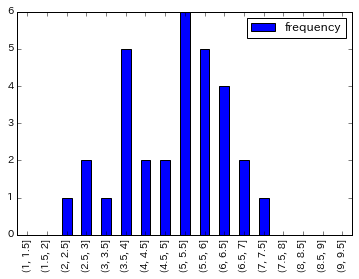

In [11]:
classfied_frequency.plot(kind='bar')
plt.show()

- (2).答え
    - 代表的な4つのパターンにあてはまらない？
    - 強いてあてはめるなら、左に裾が長い。
    
### (3) 平均気温、平均湿度、日照時間の平均、分散(データの大きさnで割る)、標準偏差を求めよ。

In [12]:
# 平均気温の基本統計量
whether['平均気温'].describe()

count    31.000000
mean      5.054839
std       1.291985
min       2.200000
25%       4.000000
50%       5.300000
75%       5.950000
max       7.300000
Name: 平均気温, dtype: float64

In [13]:
# 平均気温の標本分散(データの大きさnで割る)
whether['平均気温'].var(ddof=False)

1.6153798126951084

### (4) 平均気温について累積相対度数分布表を示せ。また、累積分布図を描け。

In [14]:
cumulation_frequency = classfied_frequency.cumsum()
cumulation_frequency

,frequency
"(1, 1.5]",NaN
"(1.5, 2]",NaN
"(2, 2.5]",1.0
"(2.5, 3]",3.0
"(3, 3.5]",4.0
"(3.5, 4]",9.0
"(4, 4.5]",11.0
"(4.5, 5]",13.0
"(5, 5.5]",19.0
"(5.5, 6]",24.0


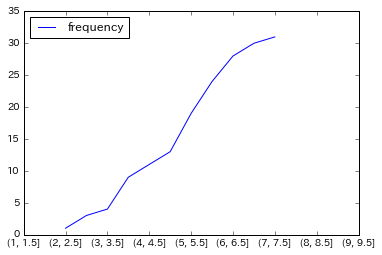

In [15]:
cumulation_frequency.plot()
plt.show()

### (5) 風向きについて度数と相対度数の表にまとめ、度数を棒グラフで描け。

In [16]:
# 度数
freq_wind = whether.groupby('風向き')['日'].count().apply(lambda x: pd.Series([x], index=['freq_wind']))
freq_wind

,freq_wind
風向き,
北北西,15
北西,10
南東,1
南西,1
東北東,2
西北西,2


In [17]:
# 相対度数の列を追加する
freq_wind['relative_freq'] = freq_wind / freq_wind.sum()
freq_wind

,freq_wind,relative_freq
風向き,,
北北西,15,0.483871
北西,10,0.322581
南東,1,0.032258
南西,1,0.032258
東北東,2,0.064516
西北西,2,0.064516


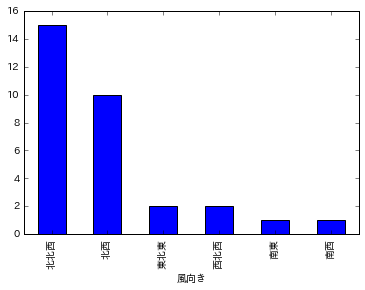

In [18]:
freq_wind.sort_values(by='freq_wind', ascending=False, inplace=True)
freq_wind['freq_wind'].plot(kind='bar')
plt.show()

### (6) 平均気温について5数要約を示し、それに基づく箱ひげ図を描け。

In [19]:
whether['平均気温'].describe()

count    31.000000
mean      5.054839
std       1.291985
min       2.200000
25%       4.000000
50%       5.300000
75%       5.950000
max       7.300000
Name: 平均気温, dtype: float64

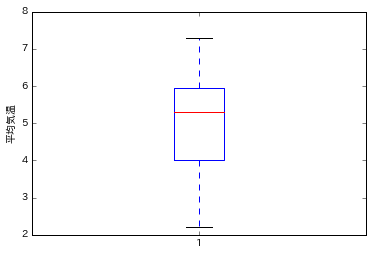

In [25]:
plt.boxplot(whether['平均気温'])
plt.ylabel('平均気温')
plt.show()

### (7) 平均気温、平均湿度、日照時間について3つの散布図を描き、それぞれの相関係数を求め考察せよ。

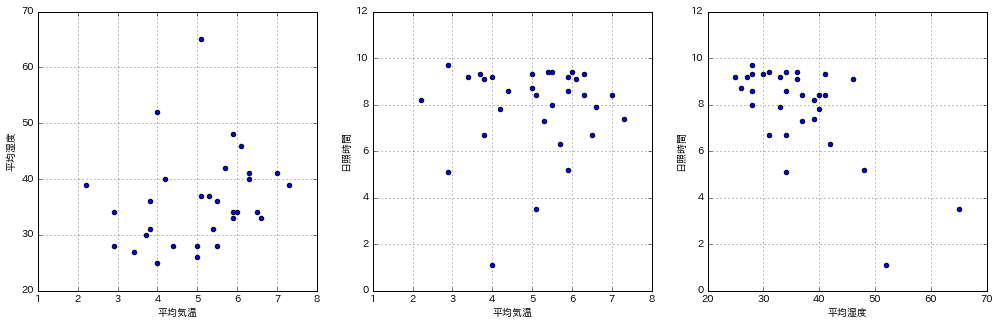

In [38]:
fig, (left, center, right) = plt.subplots(ncols=3, figsize=(17, 5))

left.scatter(whether['平均気温'], whether['平均湿度'])
left.set_xlabel('平均気温')
left.set_ylabel('平均湿度')
left.grid(True)

center.scatter(whether['平均気温'], whether['日照時間'])
center.set_xlabel('平均気温')
center.set_ylabel('日照時間')
center.grid(True)

right.scatter(whether['平均湿度'], whether['日照時間'])
right.set_xlabel('平均湿度')
right.set_ylabel('日照時間')
right.grid(True)